In [5]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [6]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [7]:
data = []
conversation = 'WhatsApp Chat with MnS 2022 SCs.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [8]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date   Time              Author  \
832 2021-08-23  20:47      Akhil😋Pechetti   
833 2021-08-23  20:47    Sahithi Mns Elec   
834 2021-08-23  20:48              Aparna   
835 2021-08-23  20:50         Sudheer Mns   
836 2021-08-23  21:02  Vikas Anna Saarang   
837 2021-08-23  21:02       Pavan Saarang   
838 2021-08-23  21:04     +91 88975 76144   
839 2021-03-09  10:19       Pavan Saarang   
840 2021-03-09  10:20         Sudheer Mns   
841 2021-03-09  10:20              Aparna   
842 2021-03-09  10:22         Sudheer Mns   
843 2021-03-09  10:23          Satvik Mns   
844 2021-03-09  10:24         Sudheer Mns   
845 2021-03-09  10:28  Vikas Anna Saarang   
846 2021-03-09  10:28         Sudheer Mns   
847 2021-03-09  10:41    Sahithi Mns Elec   
848 2021-03-09  10:42         Sudheer Mns   
849 2021-03-09  10:44     +91 88975 76144   
850 2021-03-09  10:45         Sudheer Mns   
851 2021-03-09  11:31      Akhil😋Pechetti   

                                               Message

In [9]:
df.dropna(how='any', axis=0, inplace=True)

In [10]:
total_messages = df.shape[0]
print(total_messages)

816


In [11]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)


112


In [12]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [14]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chat In mns Group")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chat In mns Group
Total Messages:  816
Number of Media Shared:  112
Number of Emojis Shared 0
Number of Links Shared 0


In [16]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['Pavan Saarang','Ishika','Sriraj','Akhil😋Pechetti','Sudheer Mns'
,'Vikas Anna Saarang','+91 88975 76144','Sahithi Mns Elec','Satvik Mns'
,'Aparna','Vivek Cse']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Pavan Saarang -
Messages Sent 189
Average Words per message 6.455026455026455
Media Messages Sent 14
Emojis Sent 0
Links Sent 0
Stats of Ishika -
Messages Sent 88
Average Words per message 4.261363636363637
Media Messages Sent 22
Emojis Sent 0
Links Sent 0
Stats of Sriraj -
Messages Sent 47
Average Words per message 2.9361702127659575
Media Messages Sent 12
Emojis Sent 0
Links Sent 0
Stats of Akhil😋Pechetti -
Messages Sent 104
Average Words per message 3.7403846153846154
Media Messages Sent 36
Emojis Sent 0
Links Sent 0
Stats of Sudheer Mns -
Messages Sent 141
Average Words per message 3.00709219858156
Media Messages Sent 17
Emojis Sent 0
Links Sent 0
Stats of Vikas Anna Saarang -
Messages Sent 76
Average Words per message 4.131578947368421
Media Messages Sent 6
Emojis Sent 0
Links Sent 0
Stats of +91 88975 76144 -
Messages Sent 17
Average Words per message 5.294117647058823
Media Messages Sent 3
Emojis Sent 0
Links Sent 0
Stats of Sahithi Mns Elec -
Messages Sent 14
Average W

There are 17373 words in all the messages.


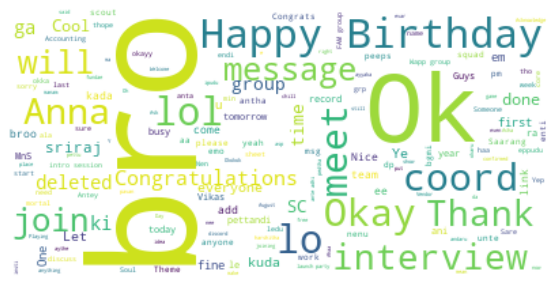

In [17]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Pavan Saarang
Author name Ishika
Author name Sriraj
Author name Akhil😋Pechetti
Author name Sudheer Mns
Author name Vikas Anna Saarang
Author name +91 88975 76144
Author name Sahithi Mns Elec
Author name Satvik Mns
Author name Aparna
Author name Vivek Cse


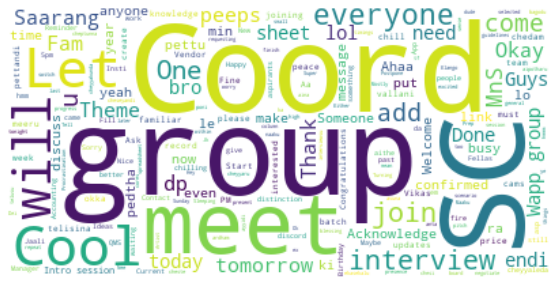

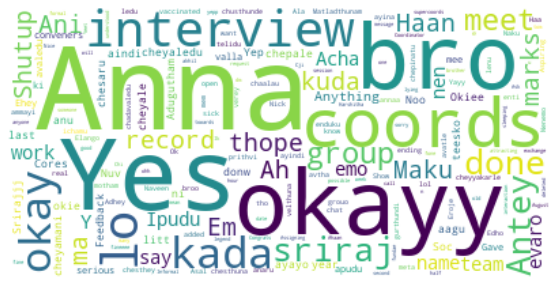

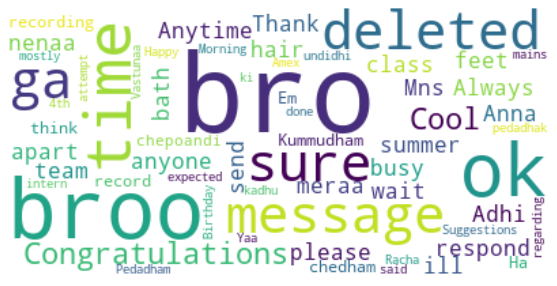

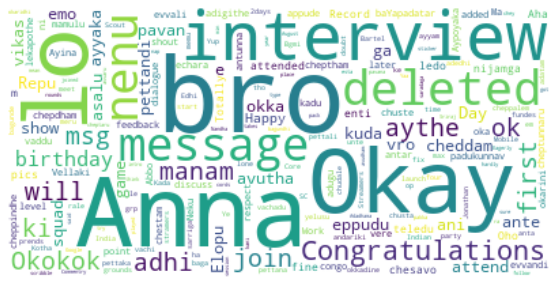

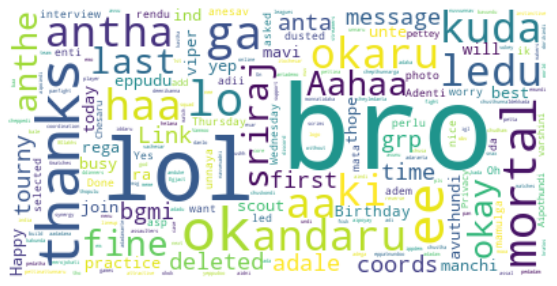

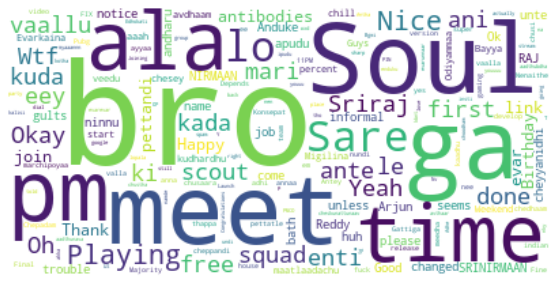

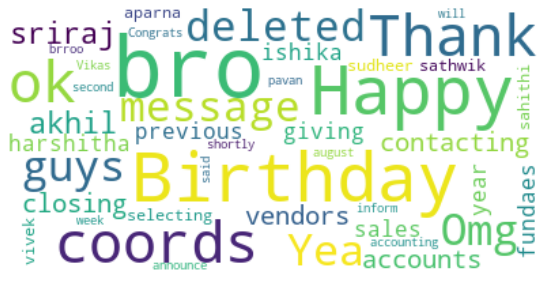

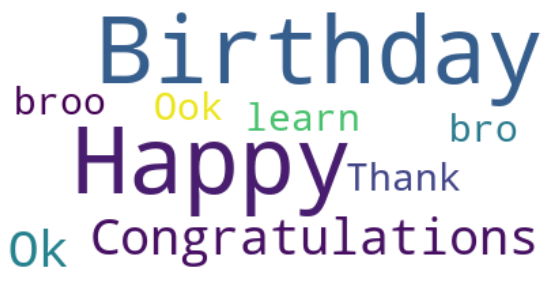

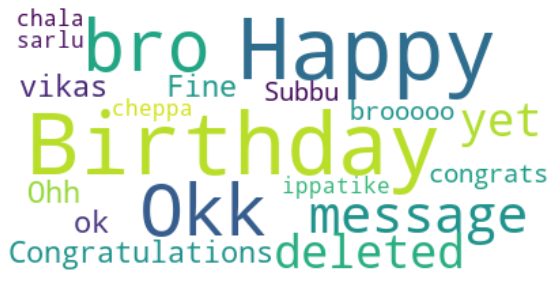

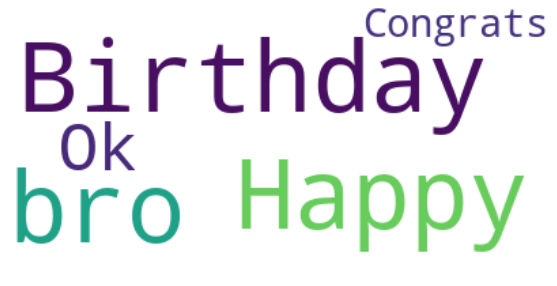

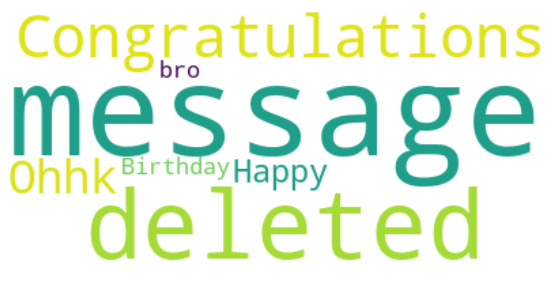

In [18]:
l = ['Pavan Saarang','Ishika','Sriraj','Akhil😋Pechetti','Sudheer Mns'
,'Vikas Anna Saarang','+91 88975 76144','Sahithi Mns Elec','Satvik Mns'
,'Aparna','Vivek Cse']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Text(0, 0.5, 'time')

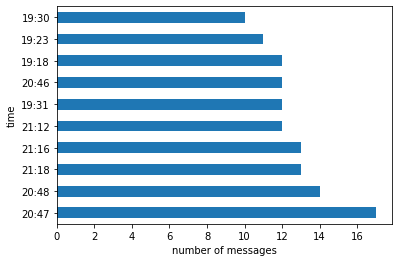

In [19]:
messages_df['Time'].value_counts().head(10).plot.barh()
plt.xlabel('number of messages')
plt.ylabel('time')